# 필요 Import 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 설정

In [2]:
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

# 데이터 불러오기 

In [4]:
df = pd.read_csv("Data/소상공인시장진흥공단_상가(상권)정보_서울_202203.csv")

# 사용할 컬럼만 정의 

In [5]:
columns = ["상호명", "상권업종대분류명", "상권업종중분류명", "상권업종소분류명",
          "시도명", "시군구명", "행정동명", "법정동명", "도로명주소",
          "경도", "위도"]
df=df[columns].copy()

In [6]:
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,서울특별시 영등포구 영중로14길 11-17,126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,서울특별시 성동구 용답5길 2,127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,서울특별시 종로구 서순라길 17-10,126.993530,37.571848
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,서울특별시 송파구 위례성대로12길 31,127.121520,37.510967
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 동광로18길 82,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...
312806,네일프렌들리,생활서비스,이/미용/건강,발/네일케어,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 법원로11길 11,127.118424,37.484759
312807,코드짐,스포츠,실내운동시설,헬스클럽,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로84길 16,126.921695,37.511835
312808,진디자인,생활서비스,광고/인쇄,인쇄종합,서울특별시,은평구,대조동,대조동,서울특별시 은평구 연서로22길 9-16,126.919811,37.614986
312809,디씨엔터테인먼트,생활서비스,행사/이벤트,연예인대리업,서울특별시,강남구,논현2동,논현동,서울특별시 강남구 논현로118길 28,127.035179,37.510257


# 상호명 소문자로 만들기 

In [7]:
df["상호명_소문자"] = df["상호명"].str.lower()

# 이디야, 스타벅스 파생변수 만들기

In [11]:
df_cafe = df.loc[df["상호명_소문자"].str.contains("스타벅스|starbucks|이디(야|아)|ediya")].copy()

/var/folders/6y/x7mscwfj5v1glksbx09ymx2m0000gn/T/ipykernel_28823/280920871.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_cafe = df.loc[df["상호명_소문자"].str.contains("스타벅스|starbucks|이디(야|아)|ediya")].copy()


In [12]:
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
1107,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야커피
1463,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 63로 40,126.939198,37.519544,이디야커피
1512,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,동숭동,서울특별시 종로구 동숭길 110,127.003887,37.582964,스타벅스
2359,이디야커피양재AT점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재2동,양재동,서울특별시 서초구 동산로 3,127.040265,37.469075,이디야커피양재at점
2426,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,금천구,시흥2동,시흥동,서울특별시 금천구 금하로 750,126.913646,37.449066,이디야커피
...,...,...,...,...,...,...,...,...,...,...,...,...
302528,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,동대문구,용신동,신설동,서울특별시 동대문구 천호대로 11-3,127.024925,37.575058,이디야커피
308551,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강동구,명일1동,명일동,서울특별시 강동구 구천면로 424,127.145560,37.550340,이디야커피
311255,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,방배3동,방배동,서울특별시 서초구 방배로 42,126.999766,37.478714,이디야커피
311438,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,교남동,평동,서울특별시 종로구 통일로 134,126.966238,37.566791,스타벅스


# 브랜드명 정의하기

In [13]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), "브랜드명"] = "스타벅스"

In [14]:
df_cafe.loc[-df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), "브랜드명"] = "이디야"

In [15]:
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
1107,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야커피,이디야
1463,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 63로 40,126.939198,37.519544,이디야커피,이디야
1512,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,동숭동,서울특별시 종로구 동숭길 110,127.003887,37.582964,스타벅스,스타벅스
2359,이디야커피양재AT점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재2동,양재동,서울특별시 서초구 동산로 3,127.040265,37.469075,이디야커피양재at점,이디야
2426,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,금천구,시흥2동,시흥동,서울특별시 금천구 금하로 750,126.913646,37.449066,이디야커피,이디야
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302528,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,동대문구,용신동,신설동,서울특별시 동대문구 천호대로 11-3,127.024925,37.575058,이디야커피,이디야
308551,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강동구,명일1동,명일동,서울특별시 강동구 구천면로 424,127.145560,37.550340,이디야커피,이디야
311255,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,방배3동,방배동,서울특별시 서초구 방배로 42,126.999766,37.478714,이디야커피,이디야
311438,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,교남동,평동,서울특별시 종로구 통일로 134,126.966238,37.566791,스타벅스,스타벅스


# 상권업종중분류명 != 커피점/카페 제거하기

In [16]:
df_cafe["상권업종중분류명"].value_counts()

커피점/카페       902
학원-어학          2
기타서비스업         2
한식             2
유흥주점           1
패스트푸드          1
주택수리           1
주유소/충전소        1
기타판매업          1
실내운동시설         1
운동/경기용품소매      1
사진             1
Name: 상권업종중분류명, dtype: int64

In [17]:
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()

# 두 개 브랜드 비교하기

## 브랜드 개수 비교

In [18]:
df_cafe["브랜드명"].value_counts()

스타벅스    459
이디야     443
Name: 브랜드명, dtype: int64

## countplot 으로 비교

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

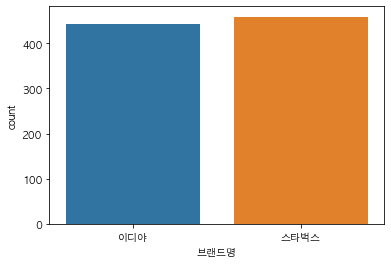

In [19]:
sns.countplot(data=df_cafe, x="브랜드명")

## countplot으로 비교 (시군구명+ 브랜드명)

<AxesSubplot:xlabel='시군구명', ylabel='count'>

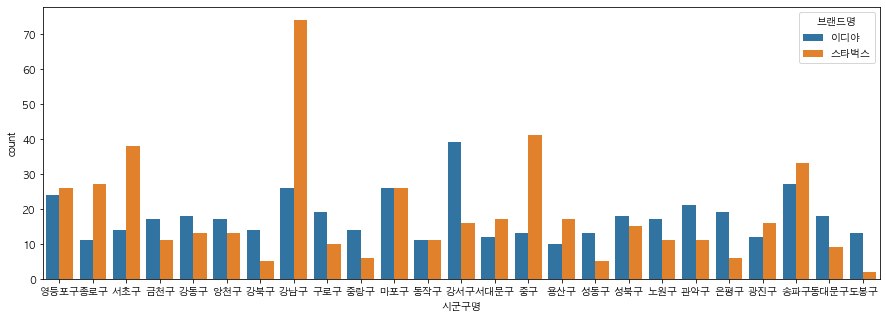

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

## Scatterplot으로 비교

<AxesSubplot:xlabel='경도', ylabel='위도'>

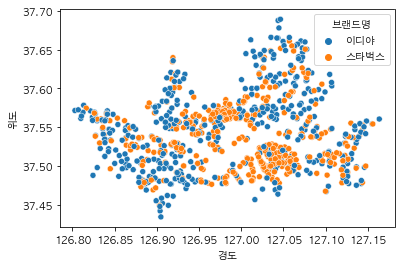

In [22]:
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

# 구별 브랜드별 점포수 

In [26]:
df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()

In [28]:
df_cafe_vs = df_cafe_vs.reset_index()

In [29]:
df_cafe_vs.columns = ["구", "브랜드명", "매장수"]

In [30]:
df_cafe_vs

,구,브랜드명,매장수
0,강남구,스타벅스,74
1,강남구,이디야,26
2,강동구,스타벅스,13
3,강동구,이디야,18
4,강북구,스타벅스,5
5,강북구,이디야,14
6,강서구,스타벅스,16
7,강서구,이디야,39
8,관악구,스타벅스,11
9,관악구,이디야,21


<AxesSubplot:xlabel='구', ylabel='매장수'>

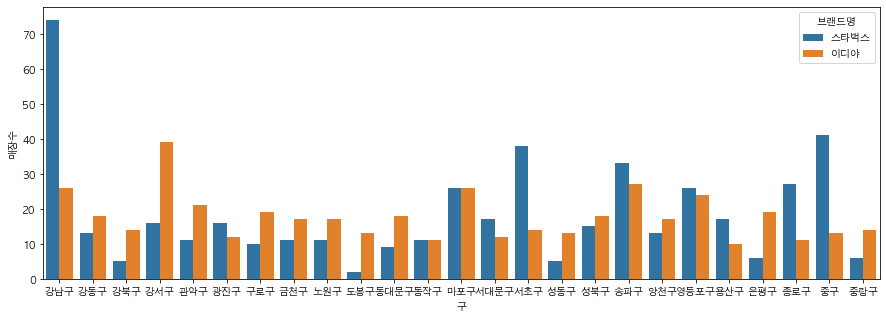

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_cafe_vs, x="구", y="매장수", hue="브랜드명")

# 지도 표시하기

In [34]:
import folium

In [36]:
lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()
lat,long

(37.54221150750955, 126.9885839087247)

In [37]:
m = folium.Map([lat, long])

In [39]:
m = folium.Map([lat,long], zoom_start=12)

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    sub_title = df_cafe.loc[i, "상호명"] + ' - ' +df_cafe.loc[i, "도로명주소"]
    
    color="green"
    if df_cafe.loc[i, "브랜드명"] == "이디야" :
        color="blue"
        
    folium.Marker([sub_lat,sub_long], icon=folium.Icon(color=color), toolip = sub_title).add_to(m)
    
m

In [40]:
m = folium.Map([lat,long], zoom_start=12, tiles="Stamen Toner")

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    sub_title = df_cafe.loc[i, "상호명"] + ' - ' +df_cafe.loc[i, "도로명주소"]
    
    color="green"
    if df_cafe.loc[i, "브랜드명"] == "이디야" :
        color="blue"
        
    folium.Marker([sub_lat,sub_long], icon=folium.Icon(color=color), toolip = sub_title).add_to(m)
    
m

# choropleth로 표현하기

In [41]:
geo_path = 'Data/seoul_municipalities_geo_simple.json'

In [42]:
import json

In [43]:
geo_json = json.load(open(geo_path, encoding="utf-8"))

In [44]:
geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [45]:
geo_json["features"][0]["properties"]["name"]

'강동구'

## 스타벅스 매장 분포

In [47]:
df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()

In [49]:
m = folium.Map([lat,long],tiles="Stamen Toner")

folium.Choropleth(
    geo_data = geo_json,
    name='choropleth',
    data=df_star,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수'
).add_to(m)

m

## 이디야 매장 분포

In [50]:
df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"] == "이디야"].copy()
df_ediya

,구,브랜드명,매장수
1,강남구,이디야,26
3,강동구,이디야,18
5,강북구,이디야,14
7,강서구,이디야,39
9,관악구,이디야,21
11,광진구,이디야,12
13,구로구,이디야,19
15,금천구,이디야,17
17,노원구,이디야,17
19,도봉구,이디야,13


In [51]:
m = folium.Map([lat,long], tiles="Stamen Toner")

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data=df_ediya,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수'
).add_to(m)
    
m

## circlemarker

In [57]:
# df_vs 라는 변수에 구별 브랜드명을 Pivot해서 스타벅스와 이디야 매장을 비교할 수 있는 형태로 만들기,
# 그리고 ["스타벅스", "이디야"]로 컬럼명을 변경해주고
# 스타벅스와 이디야의 매장을 비교한 값을 "매장수비교" 컬럼에 담아주기
df_vs = df_cafe_vs.pivot(index="구", columns="브랜드명", values="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0 

In [58]:
# 스타벅스가 이디야보다 많을 떄 1을 출력하도록 함
df_vs["매장수비교"] = df_vs["매장수비교"].astype(float)

In [59]:
df_vs

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,74,26,1.0
강동구,13,18,0.0
강북구,5,14,0.0
강서구,16,39,0.0
관악구,11,21,0.0
광진구,16,12,1.0
구로구,10,19,0.0
금천구,11,17,0.0
노원구,11,17,0.0


In [60]:
# 구를 컬럼명으로 사용하기 위해 reset_index를 함
# 데이터프레임을 df_vs에 저장
df_vs = df_vs.reset_index()
df_vs

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,74,26,1.0
1,강동구,13,18,0.0
2,강북구,5,14,0.0
3,강서구,16,39,0.0
4,관악구,11,21,0.0
5,광진구,16,12,1.0
6,구로구,10,19,0.0
7,금천구,11,17,0.0
8,노원구,11,17,0.0
9,도봉구,2,13,0.0


## 지도로 비교하기

In [61]:
m = folium.Map([lat,long], tiles="Stamen Toner")

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)
    
    
m

## 구별 서클마커 표현하기 

In [62]:
# 구별 서클마커를 표한하기 위해서는 각 구의 위경도 값을 구해야함
# 구별 위도와 경도를 가져와 평균을 구해서 사용함
# 특정 구의 위경도 평균 구하기

for i in df_vs.index:
    print(df_vs.loc[i, "구"])

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


In [66]:
df_gu_mean = df_cafe.pivot_table(index="시군구명", values=["경도", "위도"], aggfunc="mean")
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean

,시군구명,경도,위도
0,강남구,127.046723,37.505727
1,강동구,127.136514,37.541878
2,강북구,127.022657,37.632332
3,강서구,126.838848,37.555211
4,관악구,126.932621,37.481498
5,광진구,127.082657,37.545834
6,구로구,126.875413,37.495459
7,금천구,126.891826,37.468724
8,노원구,127.068463,37.641130
9,도봉구,127.042025,37.659539


In [67]:
df_vs

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,74,26,1.0
1,강동구,13,18,0.0
2,강북구,5,14,0.0
3,강서구,16,39,0.0
4,관악구,11,21,0.0
5,광진구,16,12,1.0
6,구로구,10,19,0.0
7,금천구,11,17,0.0
8,노원구,11,17,0.0
9,도봉구,2,13,0.0


In [68]:
df_vs = df_vs.merge(df_gu_mean, how='inner', left_on="구", right_on="시군구명")

In [69]:
df_vs

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,74,26,1.0,강남구,127.046723,37.505727
1,강동구,13,18,0.0,강동구,127.136514,37.541878
2,강북구,5,14,0.0,강북구,127.022657,37.632332
3,강서구,16,39,0.0,강서구,126.838848,37.555211
4,관악구,11,21,0.0,관악구,126.932621,37.481498
5,광진구,16,12,1.0,광진구,127.082657,37.545834
6,구로구,10,19,0.0,구로구,126.875413,37.495459
7,금천구,11,17,0.0,금천구,126.891826,37.468724
8,노원구,11,17,0.0,노원구,127.068463,37.641130
9,도봉구,2,13,0.0,도봉구,127.042025,37.659539


In [70]:
m = folium.Map([lat,long],zoom_start=11, tiles="Stamen Toner")

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)
    
for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    cafes = ["스타벅스", "이디야"]
    for cafe in cafes:
        cafe_count = df_vs.loc[i, cafe]
        
        gu = df_vs.loc[i,"구"]
        tooltip = f"{gu} {cafe}: {cafe_count}"
        radius = np.sqrt(cafe_count) * 3
        
        color="green"
        if cafe == "이디야":
            color="blue"
            sub_long = sub_long + 0.01
            
        folium.CircleMarker([sub_lat, sub_long],
                            radius = radius,
                            color=color,
                            fill=True,
                            tooltip = tooltip
                           ).add_to(m)  
m